
# **Principal Component Analysis (PCA)**
 
Dr. Jean-Marc Odobez and Dr. Michael Villamizar<br>
Idiap Research Institute<br>
2019


In [1]:
# Import libraries.
from __future__ import print_function
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.decomposition import PCA

# Own libraries.
sys.path.append('../libs/')
import utils as utils

## **1. USPS dataset**

In this notebook we use the USPS dataset which has 9298 images of handwritten digits. The images are 16x16 grayscale pixels. 

### **1.1 Load dataset**
The code below loads the USPS digits dataset which contains squared images ($X$) and their corresponding labels ($L$). This dataset has ten digits (0-9). The images are given in vector format of 256 dimensions (16x16 images). 

In [2]:
# Load USPS digits dataset: images (X) 
# and labels (L).
X, L = utils.load_dataset()

# Message.
print ('\nUSPS Dataset:')
print ('+ Num. samples: {}'.format(X.shape[0]))
print ('+ Images format', X.shape)
print ('+ Labels format', L.shape)


USPS Dataset:
+ Num. samples: 9298
+ Images format (9298, 256)
+ Labels format (9298, 1)


### **1.2 Visualization**

Run the next cell to visualize some example images in the dataset.

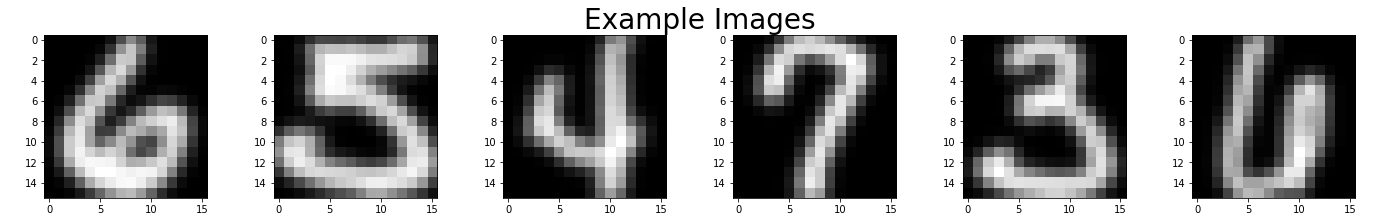

In [3]:
# Subset with the first six images.
X_sel = X[:6,:]

# Show example images.
utils.show_images(X_sel, title='Example Images')

### **1.3 One-Digit Dataset**

The USPS dataset can also be loaded for a particular digit (eg. 8). This is implemented in the next cell. The image format is the same (256-dim vectors).

In [4]:
# Parameters.
digit = 8  # Selected digit.

# Load ataset for digit 8.
X, L = utils.load_dataset(digit=digit)

# Message.
print ('\nUSPS -one digit- Dataset:')
print ('+ Num. samples: {}'.format(X.shape[0]))
print ('+ Images format', X.shape)
print ('+ Labels format', L.shape)


USPS -one digit- Dataset:
+ Num. samples: 708
+ Images format (708, 256)
+ Labels format (708, 1)


Run the  next cell to display some example images for the one-digit dataset.

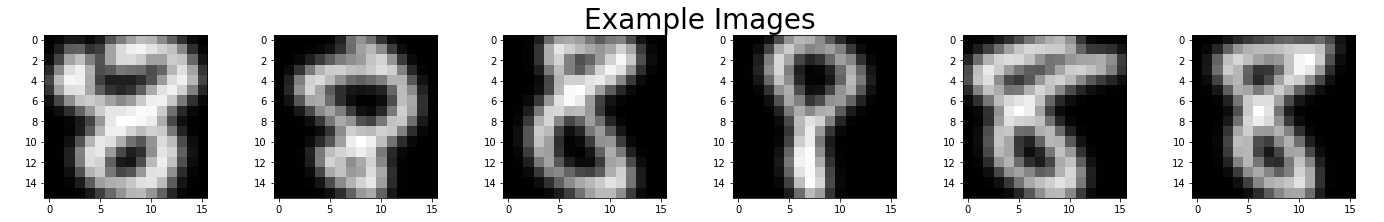

In [5]:
# Subset with the first six images.
X_sel = X[:6,:]

# Show example images.
utils.show_images(X_sel, title='Example Images')

## **2. Functions to complete**
Next, you will find some functions that must be completed to run PCA.

***Tip:*** To implement PCA you can follow the course formula, and use SVD or EIG to solve for the eigenvalues. Alternatively, you can use the scikit-learn function [PCA()](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [6]:
# PCA.
def my_pca(X):
    """ This function performs the extraction of the PCA components 
        given a dataset (X). 
        
        Input:
            X: NxD array of N points x of dimension D.
        Output:
            Lambda: Set of eigenvalues of the covariance matrix 
                ranked in decreasing order.
            U: Matrix of eigenvectors (one row per eigenvector, 
                ranked in the same order than eigenvalues).
            mean_X: Average value of the data in X (vector of 
                size D)
    """
    
    # Number of samples and dimension.
    N, D = X.shape
    
    # Dummy variables.
    X_mean = np.zeros(D)  # Mean data.
    Lambda = np.ones(D)  # Eigenvalues.
    U = np.ones((D,D))  # Eigenvectors.
    
    #======================================
    # Complete the code below.
    #======================================
    
    # PCA.
    #pca = ... 
    #pca.fit(...)
    
    # Outcome.
    #U = ...
    #Lambda = ...
    #X_mean = ...
    
    return Lambda, U, X_mean

# PCA projection.
def pca_projection(X, X_mean, UM):
    """ This function projects a matrix of data points X on the 
        first M eigenvectors.
        
        Input:
            X: NxD data matrix (N rows of data points of dimension D).
            X_mean: Mean of data points provided by my_pca (vector of D 
                dimensions)
            UM: MxD projection matrix containing the first M eigenvectors 
                obtained from my_pca.
        Output:
            Y: NxM matrix containing the components in PCA subspace for 
                all data points of X.
    """
    # Number of samples and components.
    N = X.shape[0]
    M = UM.shape[0]
    
    # Dummy Y.
    Y = np.ones((N,M))
    
    #======================================
    # Complete the code below.
    #======================================
    
    #Y = ...
    
    return Y

# PCA reconstruction.
def pca_reconstruction(Y, X_mean, UM):
    """ This function reconstructs data points given their coordinates Y 
        in the space spanned by the M eigenvectors of UM.
        
        Input:
            Y: NxM coordinates in low M dimensional space of the N points
                to (re)construct. 
            X_mean: Mean of data points provided by my_pca (one row of D values).
            UM: MxD projection matrix containing the first M eigenvectors 
                obtained from my_pca.
        Output:   
            X_tilde: NxD matrix containing the constructed vectors. 
    """
   
    # Number of samples and data dimension.
    N = Y.shape[0]
    D = UM.shape[1]
    
    # Dummy variable.
    X_tilde = np.zeros((N,D))

    #======================================
    # Complete the code below.
    #======================================
    
    #X_tilde = ...
    
    return X_tilde

## **3. Principal Components Analysis (PCA)**
The code below shows how to perform PCA on the dataset $X$, and how to process and visualize data with PCA.

In [7]:
# Load dataset for digit 7.
X, L = utils.load_dataset(digit=7)

# PCA decomposition.
Lambda, U, X_mean = my_pca(X)

Run the next cell to plot the eigenvalues (assumed to have been ranked in the decreasing order).

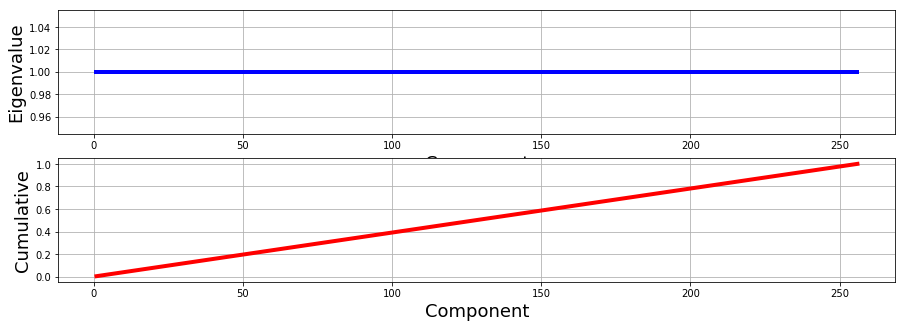

In [8]:
# Plot eigenvalues, including normalized cumulative.
utils.plot_eigenvalues(Lambda)

The next function shows the first eigenvectors (the raw vectors).

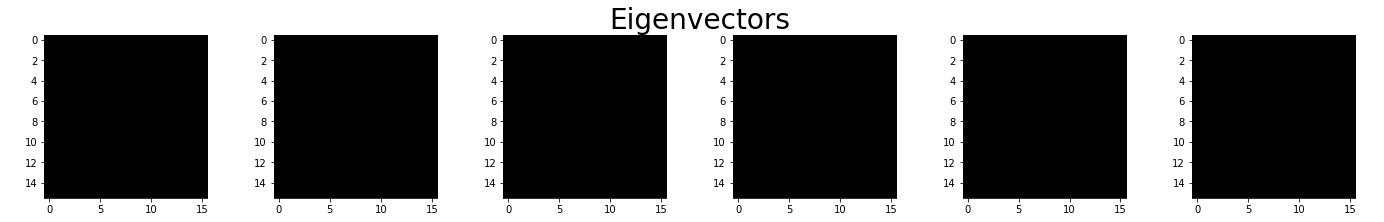

In [9]:
# First six eigenvectors.
U_sel = U[:6,:]

# Show eigenvectors.
utils.show_images(U_sel, title='Eigenvectors')

The next code shows how to project a set of data in the lower dimensional space, and then how to reconstruct it. 

In [10]:
# Parameters.
M = 5  # M first components.

# Projection matrix comprising only the M first eigenvectors.
UM = U[:M,:]

# Select a few images.
X_sel = X[:7,:]

# Project each image in the lower manifold of dimension M.
Y_sel = pca_projection(X_sel, X_mean, UM)

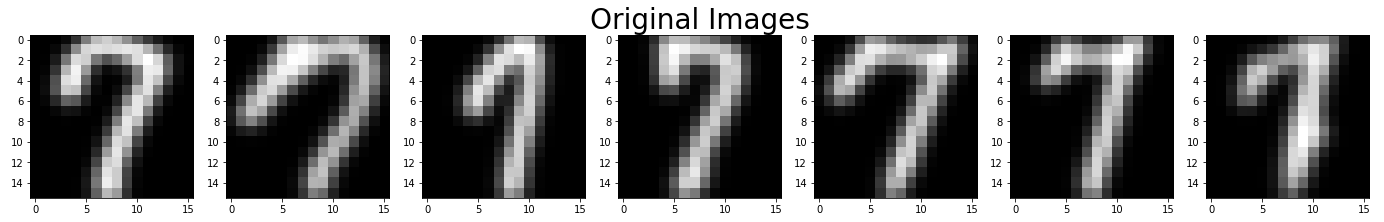

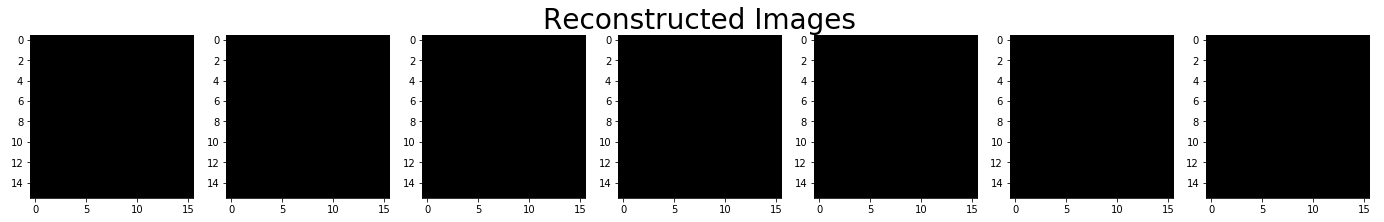

In [11]:
# Reconstruct the input images.
X_sel_tilde = pca_reconstruction(Y_sel, X_mean, UM)

# Show original and reconstructed images.
utils.show_images(X_sel, title='Original Images')
utils.show_images(X_sel_tilde, title='Reconstructed Images')

The different steps could be done in one script. Of course, the function could return more elements.

In [12]:
# Run PCA.
def run_pca(X, M):
    # PCA.
    Lambda, U, X_mean = my_pca(X)
    # Projection matrix comprising only 
    # the M first eigenvectors.
    UM = U[:M,:]
    # Projection of dataset images.
    Y = pca_projection(X, X_mean, UM)
    # Reconstruction.
    X_tilde = pca_reconstruction(Y, X_mean, UM)
    return X_tilde

As an example, the next cell runs PCA for the full digits dataset.

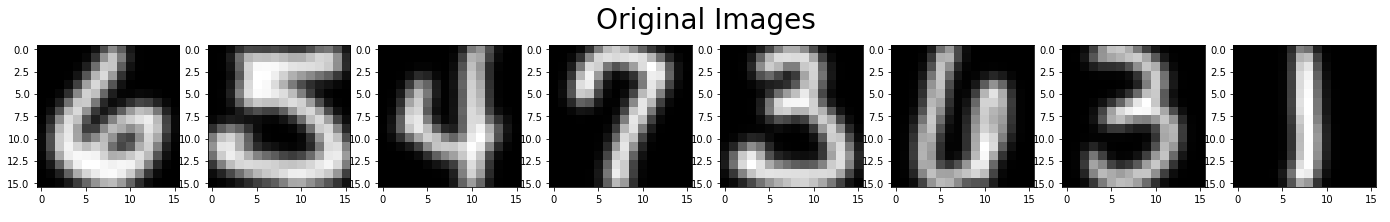

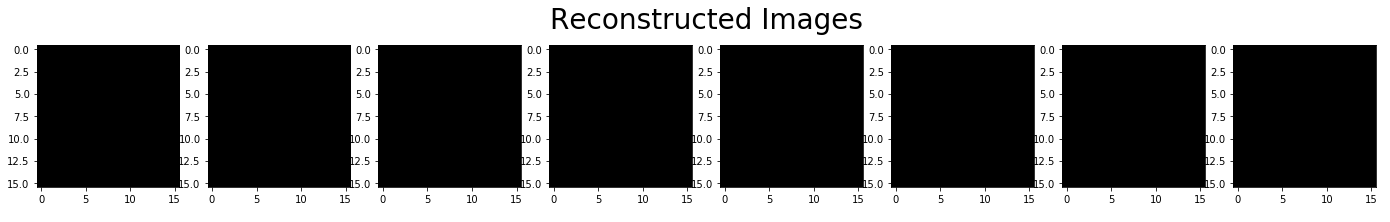

In [13]:
# Parameters.
M = 10 # M first components.
digit = None # Chosen digit.

# Load USPS dataset.
X, L = utils.load_dataset(digit=digit)

# Run PCA.
X_tilde = run_pca(X, M)

# A few images (8 images) for visualization.
#indxs = np.random.randint(X.shape[0], size=8) # Random image indexes.
indxs = np.arange(0, 8)  # First image indexes.
X_sel = X[indxs,:]  # Selected images.

# Reconstructed images for the selected images.
X_sel_tilde = X_tilde[indxs,:]

# Show original and reconstructed images for first 8 images.
utils.show_images(X_sel, title='Original Images')
utils.show_images(X_sel_tilde, title='Reconstructed Images')

## **4. Playground - Exercices**

In the following, you can write your code to do the exercices proposed in the laboratory document.

### **Exercise 1**

In [14]:
# code/scripts for this exercice

### **Exercise 2**

In [15]:
# code/scripts for this exercice

## **5. Probabilistic PCA**
In all the code below, we provide the functions to use Probabilistic PCA. It follows the course notations. Look at them to match the program with the mathematical formulation.

### **5. 1 PPCA - Learning the representation, projecting in the latent (low dimensional) space, reconstructing**.

In [16]:
# PPCA.
def my_ppca(X, M):
    """ This function performs the extraction of the Probabilistic 
        PCA components given a dataset to a M dimensional subspace.
        
        Input:
            X: NxD matrix of N points x of dimension D. 
            M: Subspace dimension.
        Output:  
            mu_ml: Row vector of D columns.
            W_ml: D Rows and M column.
            sigma2_ml: Scalar, residual variance.
    """
    
    # PCA.
    Lambda, U, X_mean = my_pca(X)
    
    # Projection matrix comprising the M first eigenvectors.
    U = U.T
    UM = U[:,:M]
    
    # Variables.
    D = U.shape[1]
    LM = np.diag(Lambda[:M])
    R = np.eye(M)
    
    # Dummy variables.
    mu_ml = np.zeros(D)
    sigma2_ml = 0.0
    W_ml = np.zeros((D,M))
    
    #======================================
    # Complete the code below.
    #======================================
    
    # Data mean.
    #mu_ml = ...
    mu_ml = X_mean
        
    # Sigma2: Variance lost in the projection, averaged over
    # the number dimension decreased.
    #sigma2_ml = ...
    sigma2_ml = (1.0/(D-M))*np.sum(Lambda[M:])
    
    # W: Represents the mapping of the latent space (containing X)
    # to that of the principal subspace (containing Y).   
    #W_ml = ...
    W_ml = np.dot(np.dot(UM, (LM - sigma2_ml*np.eye(M))**(0.5)), R)
  
    return mu_ml, W_ml, sigma2_ml, LM, X_mean

# PPCA projection.
def ppca_projection(X, X_mean, W, LM):
    """ This function projects a matrix of data points X in the latent 
        space.
        
        Input:
            X: NxD data matrix (N rows of data points of dimension D).
            X_mean: Mean of data points provided by my_ppca (vector of D 
                dimensions)
            W: DxM projection matrix given by my_ppca.
            LM: MxM diagonal matrix containing the eigenvalues given by
                my_ppca function.
        Output:
            Z: NxM matrix containing the components in the latent space 
                for all data points of X.
    """
    
    # Number of samples and components.
    N = X.shape[0]
    M = W.shape[1]
    
    # Dummy variable.
    Z = np.zeros((N,M))
    
    #======================================
    # Complete the code below.
    #======================================
        
    #Z = ...
    Z = np.dot(np.dot(inv(LM), W.T), (X-X_mean).T).T
    
    return Z

# PPCA reconstruction.
def ppca_reconstruction(Z, W, mu, sigma2):
    """ This function reconstructs data points given their coordinates Z 
        in the latent space.
        
        Input:
            Z: NxM coordinates in low M dimensional space of the N points
                to (re)construct.
            W: DxM projection matrix given by my_ppca.
            mu: Mean of data points provided by my_ppca.
            sigma2: Variance lost in the projection provided by ppca.
            
        Output:   
            X_tilde: NxD matrix containing the constructed vectors. 
    """
    
    # NUmber of samples and data dimension.
    N = Z.shape[0]
    D = W.shape[0]
    
    # Dummy variable.
    X_tilde = np.zeros((N,D))
    
    #======================================
    # Complete the code below.
    #======================================
    
    #X_tilde = ...
    X_tilde = np.dot(Z, W.T) + mu + sigma2
    
    return X_tilde

### **5. 2 Using the function on data**

In [17]:
# Parameters.
M = 10 # M first components.
digit = None # Chosen digit.

# Load USPS dataset.
X, L = utils.load_dataset(digit=digit)

# Run PPCA.
mu_ppca, W_ppca, sigma2_ppca, LM_ppca, X_mean_ppca = my_ppca(X, M)

In [18]:
# Projecting the dataset points (images) in the 
# latent space of dimension M.
Z = ppca_projection(X, X_mean_ppca, W_ppca, LM_ppca)

The next code reconstructs the dataset images from the latent space.

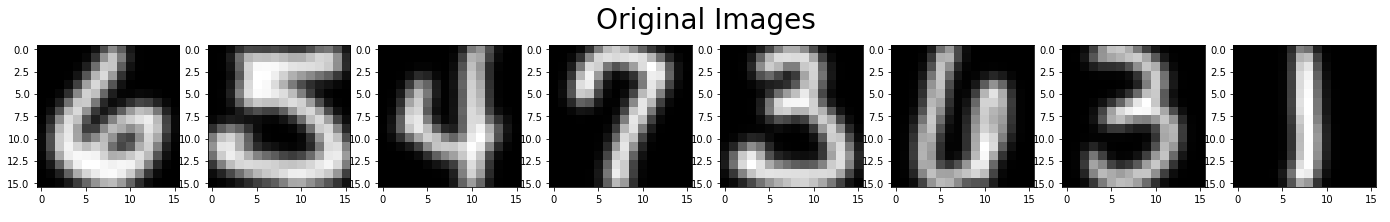

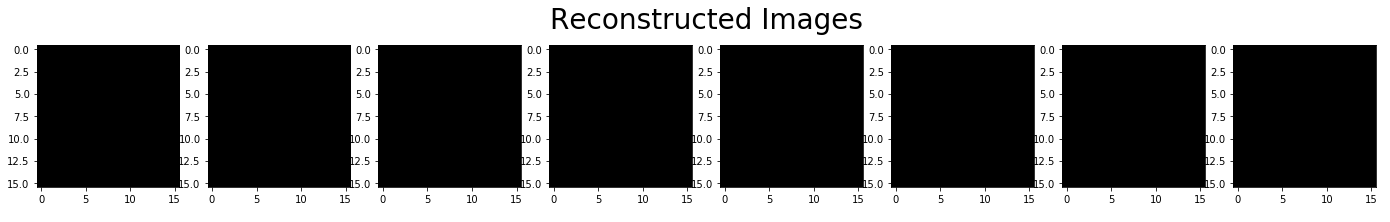

In [19]:
# Reconstruct dataset images.
X_tilde = ppca_reconstruction(Z, W_ppca, mu_ppca, sigma2_ppca)

# Show original and reconstructed images -first 8 images-.
utils.show_images(X[:8,:], title='Original Images')
utils.show_images(X_tilde[:8,:], title='Reconstructed Images')

We can summarize all these steps in one.

In [20]:
# Run PPCA.
def run_ppca(X, M):
    # PPCA.
    mu_ppca, W_ppca, sigma2_ppca, LM_ppca, X_mean_ppca = my_ppca(X, M)
    # Projection of dataset images.
    Z = ppca_projection(X, X_mean_ppca, W_ppca, LM_ppca)
    # Reconstruction.
    X_tilde = ppca_reconstruction(Z, W_ppca, mu_ppca, sigma2_ppca)
    return X_tilde

### **5.3 We can compare PCA with PPCA**

The next cell runs PCA and PPCA for the USPS images (full dataset or for a single digit). Reconstructed images are also displayed.

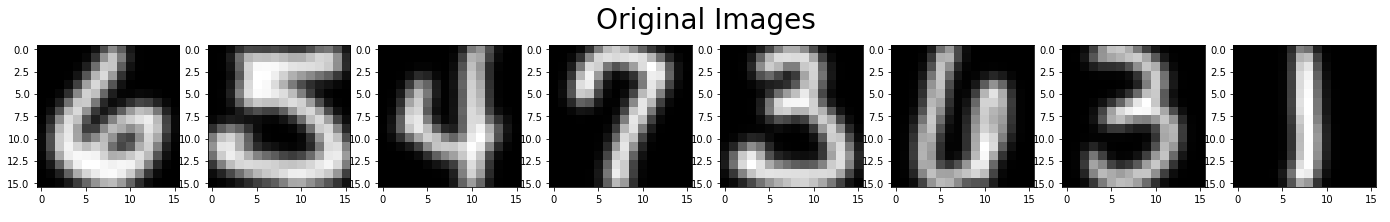

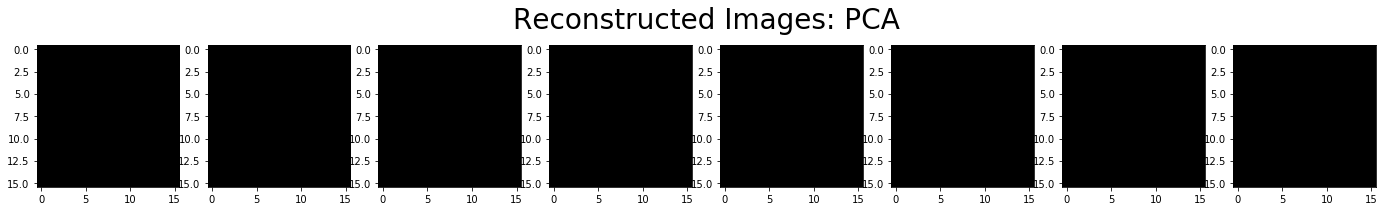

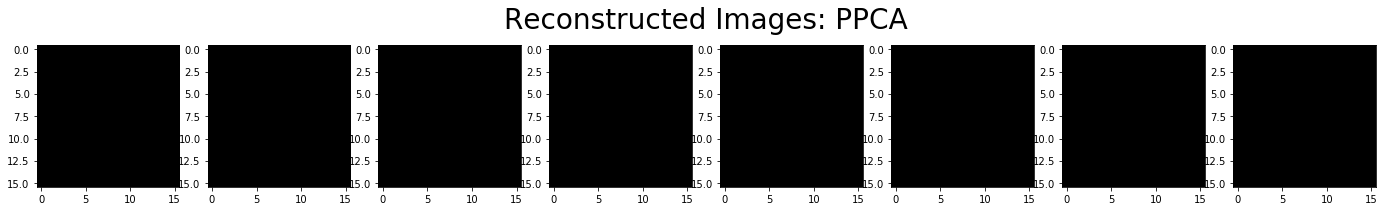

In [21]:
# Parameters.
M = 10  # Number of components.
digit = None  # Selected digit.

# Load USPS dataset.
X, _ = utils.load_dataset(digit=digit)

# Run pca and pppca. Return reconstructed images.
X_tilde_pca = run_pca(X, M)
X_tilde_ppca = run_ppca(X, M)

# Show original and reconstructed images -first 8 images-.
utils.show_images(X[:8,:], title='Original Images')
utils.show_images(X_tilde_pca[:8,:], title='Reconstructed Images: PCA')
utils.show_images(X_tilde_ppca[:8,:], title='Reconstructed Images: PPCA')

### **5.4 PPCA - Generating synthetic samples**

PPCA is a probabilistic generative model. This means that we can use to sample new data in a well grounded and probabilsitic fashion. The next function shows how to do this and sample synthetic images using the learned PPCA model.

In [22]:
def ppca_generate_samples(mu_ppca, W_ppca, sigma2_ppca, n_samples):
    """ This function uses PPCA generative process to 
        obtain samples n_samples is the number of requested 
        samples all other parameters obtained from my_ppca.
    """
       
    # Draw isotropic Gaussian latent variables.
    M = W_ppca.shape[1]
    MU = np.zeros(M)
    SIGMA = np.eye(M)
    
    # Draw lower dimensional sample n_samples rows of 
    # M dimensions.
    zhat = np.random.multivariate_normal(MU, SIGMA, n_samples)
    
    # Draw noise in data space
    D = mu_ppca.shape[0]
    Depsilon = np.random.multivariate_normal(np.zeros(D), \
                                             sigma2_ppca*np.eye(D), 1)
    # Create samples.
    samples = np.zeros((n_samples, D))
    for i in range(n_samples):
        z = np.expand_dims(zhat[i,:], axis=1)
        samples[i,:] = np.dot(W_ppca,z).T + mu_ppca + Depsilon
    
    return samples

Run the next cell to create artificial images using PPCA.

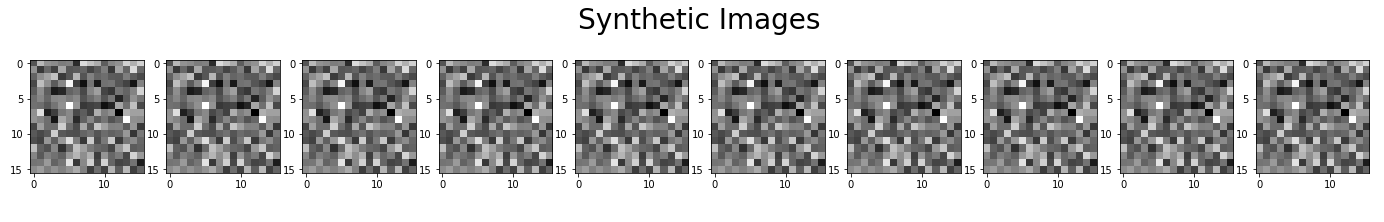

In [23]:
# Parameters.
M = 15  # Number of components.
digit = 7  # Selected digit.
N_synth = 10  # Number of synthetic images.

# Load USPS dataset.
X, _ = utils.load_dataset(digit=digit)
  
# Run PPCA.
mu_ppca, W_ppca, sigma2_ppca, _, _ = my_ppca(X, M)

# Generative process - synthesize new images.
X_synth = ppca_generate_samples(mu_ppca, W_ppca, sigma2_ppca, N_synth)

# Show images.
utils.show_images(X_synth, title='Synthetic Images')